In [157]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Heart Attack Data set.csv')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.shape

(303, 14)

In [5]:
data.duplicated().sum()

np.int64(1)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.shape

(302, 14)

In [9]:
data.rename(columns = {'cp':'Chest_pain_type', 'trestbps':'resting blood pressure', 'chol':'cholesterol', 
            'fbs':'Fasting Blood Sugar', 'thalach':'heart rate achieved',
            'oldpeak':'exercise relative to rest','slope':'slope_peak_exercise',
                       'ca':'Number_of_Major_Vessels','restecg':'resting electro cardiographic',
                       'thal':'thalium_Heart_rate','heart rate achieved':'Maximum Heart rate achievied',
                       },inplace=True)

In [10]:
data.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting blood pressure',
       'cholesterol', 'Fasting Blood Sugar', 'resting electro cardiographic',
       'heart rate achieved', 'exang', 'exercise relative to rest',
       'slope_peak_exercise', 'Number_of_Major_Vessels', 'thalium_Heart_rate',
       'target'],
      dtype='object')

In [11]:
data.describe().T

count        mean        std    min     25%  \
age                            302.0   54.420530   9.047970   29.0   48.00   
sex                            302.0    0.682119   0.466426    0.0    0.00   
Chest_pain_type                302.0    0.963576   1.032044    0.0    0.00   
resting blood pressure         302.0  131.602649  17.563394   94.0  120.00   
cholesterol                    302.0  246.500000  51.753489  126.0  211.00   
Fasting Blood Sugar            302.0    0.149007   0.356686    0.0    0.00   
resting electro cardiographic  302.0    0.526490   0.526027    0.0    0.00   
heart rate achieved            302.0  149.569536  22.903527   71.0  133.25   
exang                          302.0    0.327815   0.470196    0.0    0.00   
exercise relative to rest      302.0    1.043046   1.161452    0.0    0.00   
slope_peak_exercise            302.0    1.397351   0.616274    0.0    1.00   
Number_of_Major_Vessels        302.0    0.718543   1.006748    0.0    0.00   
thalium_Heart_rate             302.0    2.314570   0.613026    0.0    2.00   
target                         302.0    0.543046   0.498970    0.0    0.00   

                                 50%     75%    max  
age                             55.5   61.00   77.0  
sex                              1.0    1.00    1.0  
Chest_pain_type                  1.0    2.00    3.0  
resting blood pressure         130.0  140.00  200.0  
cholesterol                    240.5  274.75  564.0  
Fasting Blood Sugar              0.0    0.00    1.0  
resting electro cardiographic    1.0    1.00    2.0  
heart rate achieved            152.5  166.00  202.0  
exang                            0.0    1.00    1.0  
exercise relative to rest        0.8    1.60    6.2  
slope_peak_exercise              1.0    2.00    2.0  
Number_of_Major_Vessels          0.0    1.00    4.0  
thalium_Heart_rate               2.0    3.00    3.0  
target                           1.0    1.00    1.0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'Chest_pain_type'}>,
        <Axes: title={'center': 'resting blood pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'Fasting Blood Sugar'}>,
        <Axes: title={'center': 'resting electro cardiographic'}>,
        <Axes: title={'center': 'heart rate achieved'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'exercise relative to rest'}>,
        <Axes: title={'center': 'slope_peak_exercise'}>,
        <Axes: title={'center': 'Number_of_Major_Vessels'}>],
       [<Axes: title={'center': 'thalium_Heart_rate'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

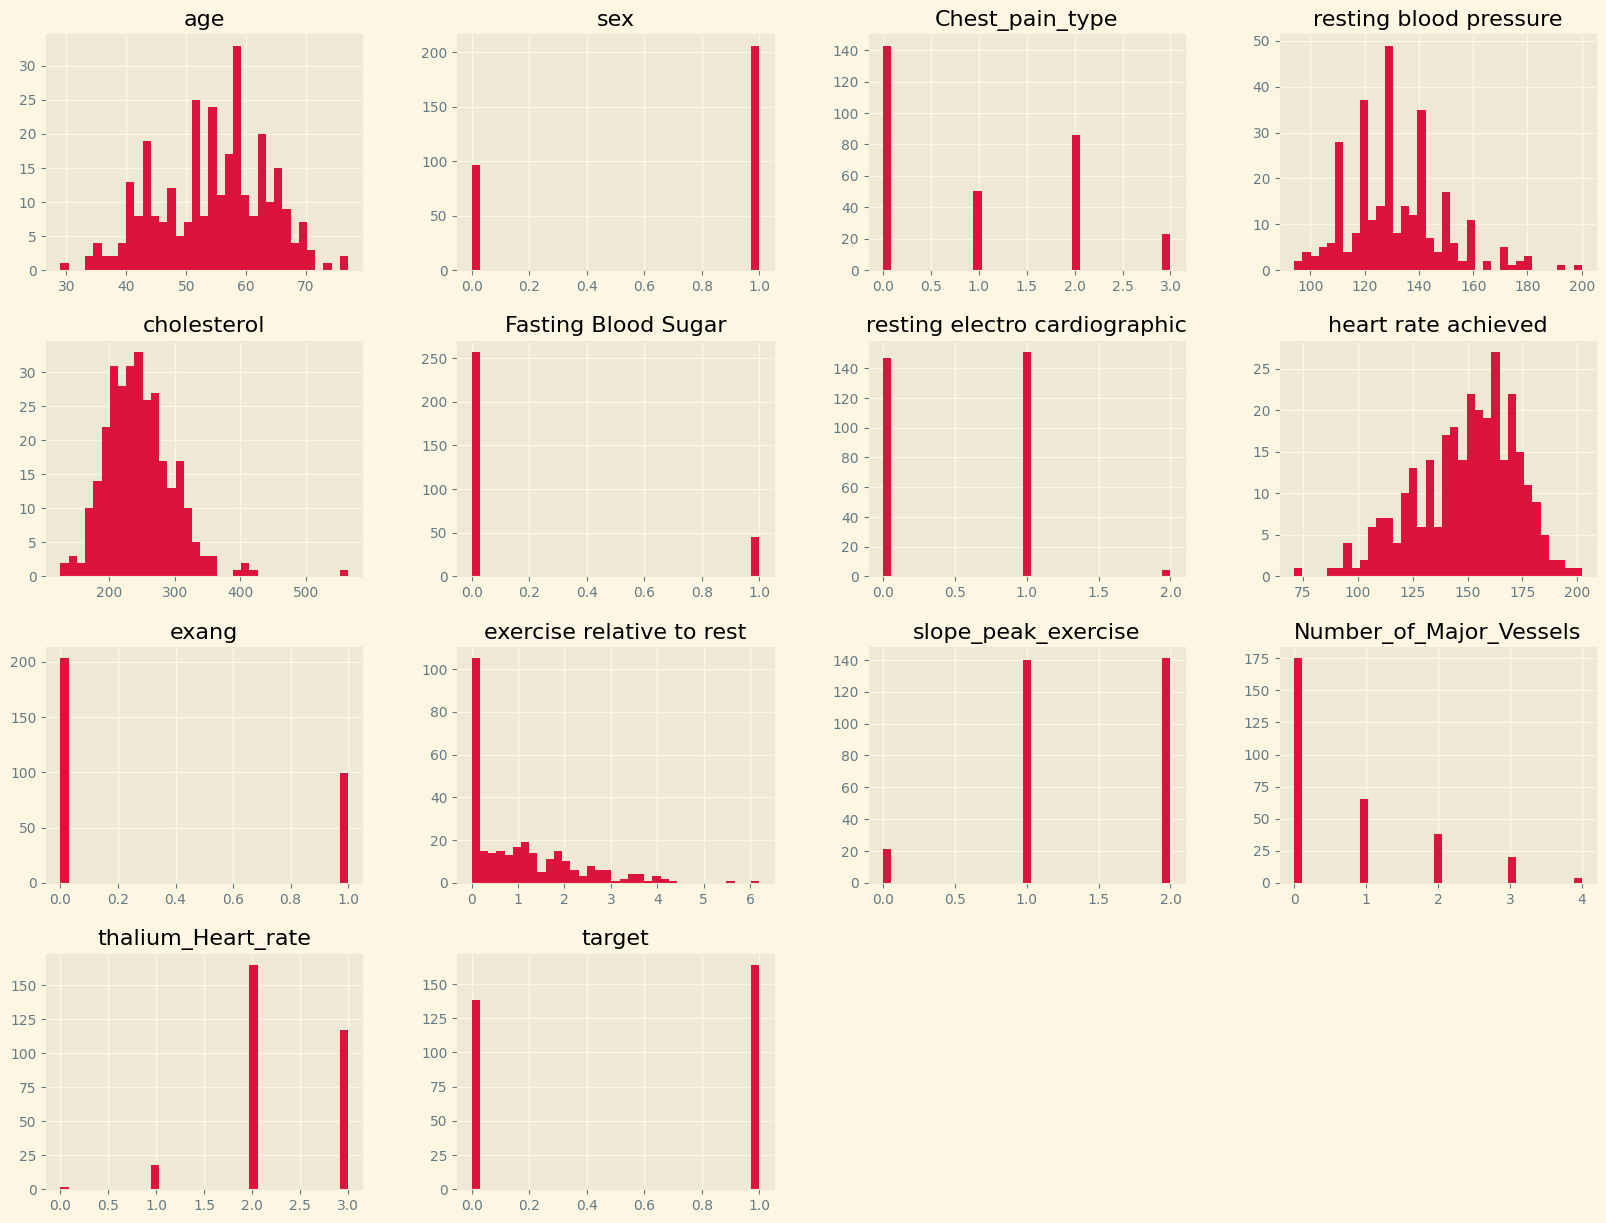

In [12]:
data.hist(bins = 35, figsize = (20,15), color = '#DC143C')

age                                  Axes(0.125,0.77;0.110714x0.11)
sex                               Axes(0.257857,0.77;0.110714x0.11)
Chest_pain_type                   Axes(0.390714,0.77;0.110714x0.11)
resting blood pressure            Axes(0.523571,0.77;0.110714x0.11)
cholesterol                       Axes(0.656429,0.77;0.110714x0.11)
Fasting Blood Sugar               Axes(0.789286,0.77;0.110714x0.11)
resting electro cardiographic       Axes(0.125,0.638;0.110714x0.11)
heart rate achieved              Axes(0.257857,0.638;0.110714x0.11)
exang                            Axes(0.390714,0.638;0.110714x0.11)
exercise relative to rest        Axes(0.523571,0.638;0.110714x0.11)
slope_peak_exercise              Axes(0.656429,0.638;0.110714x0.11)
Number_of_Major_Vessels          Axes(0.789286,0.638;0.110714x0.11)
thalium_Heart_rate                  Axes(0.125,0.506;0.110714x0.11)
target                           Axes(0.257857,0.506;0.110714x0.11)
dtype: object

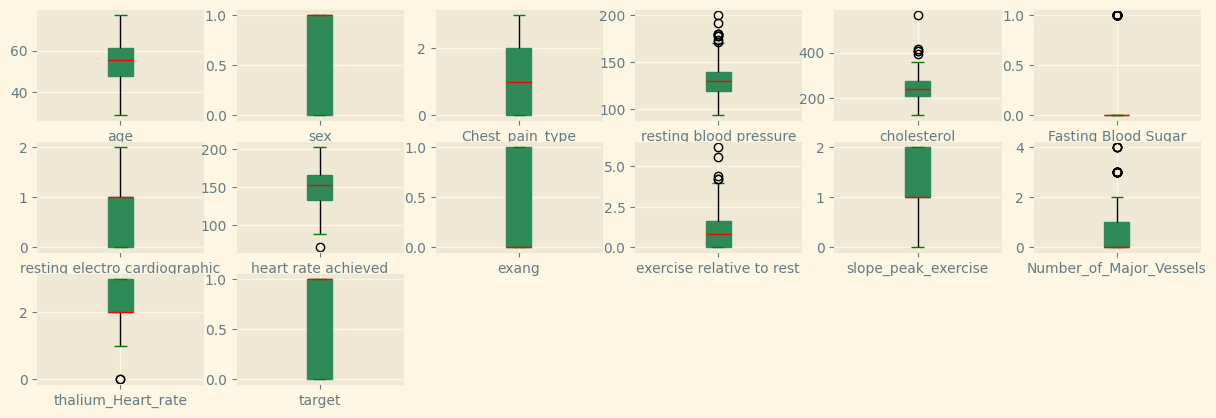

In [13]:
data.plot(kind = 'box',subplots=True, layout=(6,6) ,figsize=(15,10), patch_artist=True, color = dict(
    boxes ='seagreen' , whiskers='black', caps = 'green', medians ='red'))

In [14]:
data.head()

age  sex  Chest_pain_type  resting blood pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   Fasting Blood Sugar  resting electro cardiographic  heart rate achieved  \
0                    1                              0                  150   
1                    0                              1                  187   
2                    0                              0                  172   
3                    0                              1                  178   
4                    0                              1                  163   

   exang  exercise relative to rest  slope_peak_exercise  \
0      0                        2.3                    0   
1      0                        3.5                    0   
2      0                        1.4                    2   
3      0                        0.8                    2   
4      1                        0.6                    2   

   Number_of_Major_Vessels  thalium_Heart_rate  target  
0                        0                   1       1  
1                        0                   2       1  
2                        0                   2       1  
3                        0                   2       1  
4                        0                   2       1

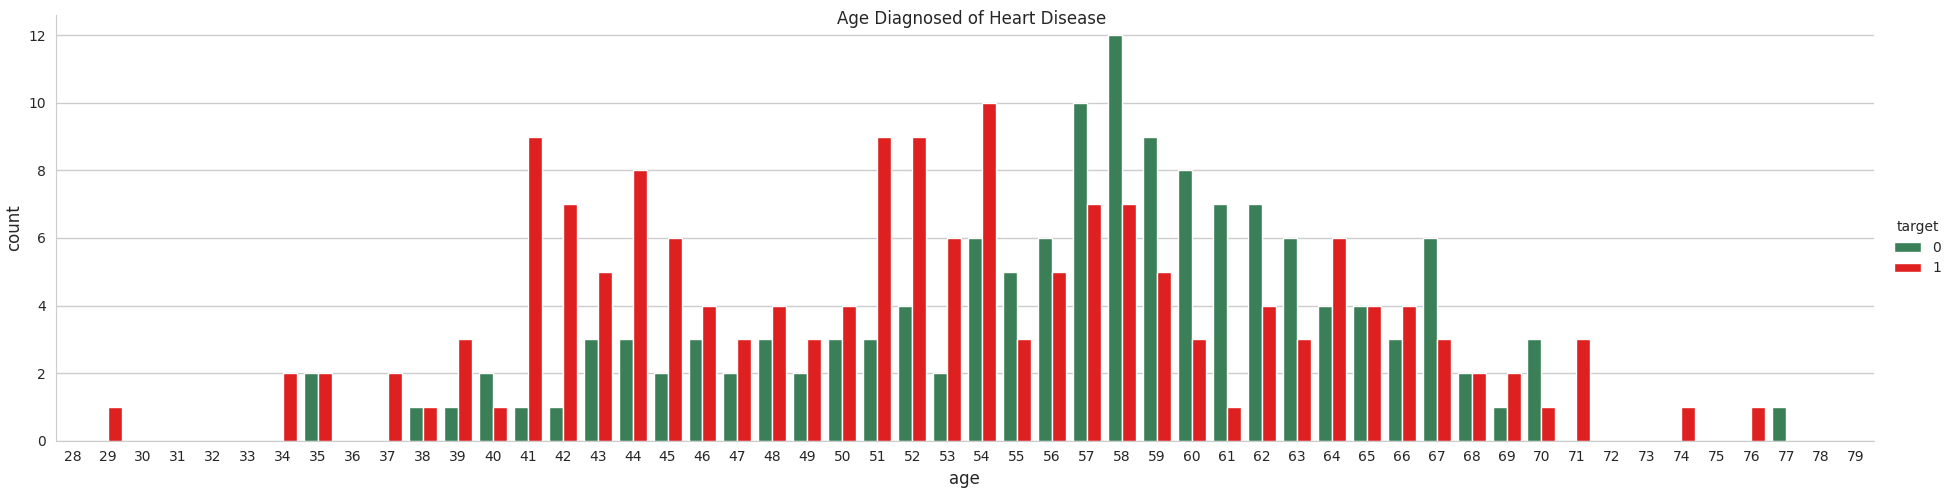

In [15]:
with sns.axes_style(style ='whitegrid'):                         #Dataset usually between The Ages of 29-77
    c = sns.catplot(data=data, x = 'age', aspect = 3.8,kind = 'count',
                   hue = 'target', palette = ['seagreen','red'],order=range(28,80))
    c.fig.suptitle('Age Diagnosed of Heart Disease')    

In [16]:
sex = data['sex'].value_counts(normalize=True)
sex

sex
1    0.682119
0    0.317881
Name: proportion, dtype: float64

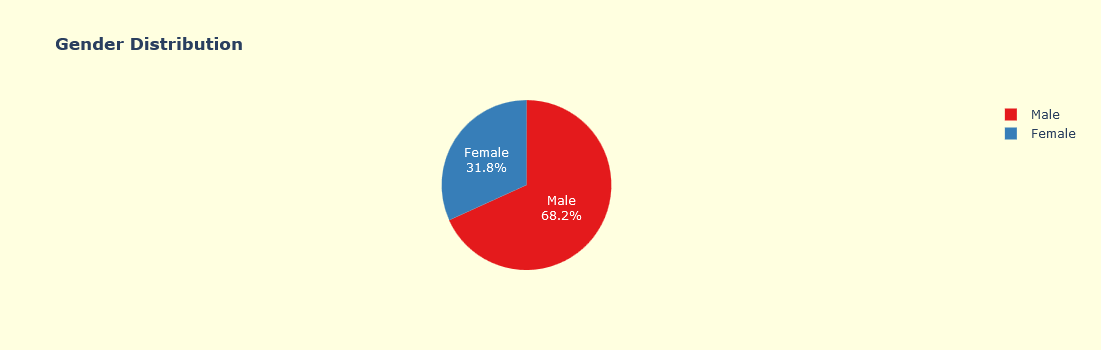

In [17]:
#Men are more diagnosed by Heart Disease than Women 
labels = {0:'Female', 1:'Male'}
fig = px.pie(sex, names = sex.index.map(labels),values = sex.values,
            title = '<b>Gender Distribution',color_discrete_sequence = px.colors.qualitative.Set1
            )

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(width=600, height=350, paper_bgcolor='lightyellow')
fig.show()

In [18]:
data['sex'] = data['sex'].map({0:'Female', 1:'Male'})

In [74]:
target = data['target'].value_counts(normalize = True)
target

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

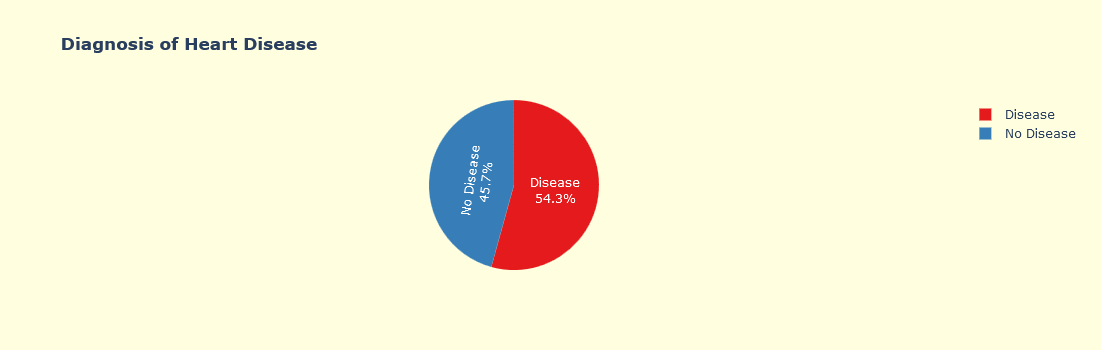

In [84]:
labels = {0:'No Disease', 1:'Disease'}
fig = px.pie(target,names = target.index.map(labels), values=target.values,
            title = '<b> Diagnosis of Heart Disease',
             color_discrete_sequence=px.colors.qualitative.Set1)
            

fig.update_traces(textposition='inside', textinfo = 'percent+label')
fig.update_layout(width=600, height=350, paper_bgcolor='lightyellow')
fig.show()

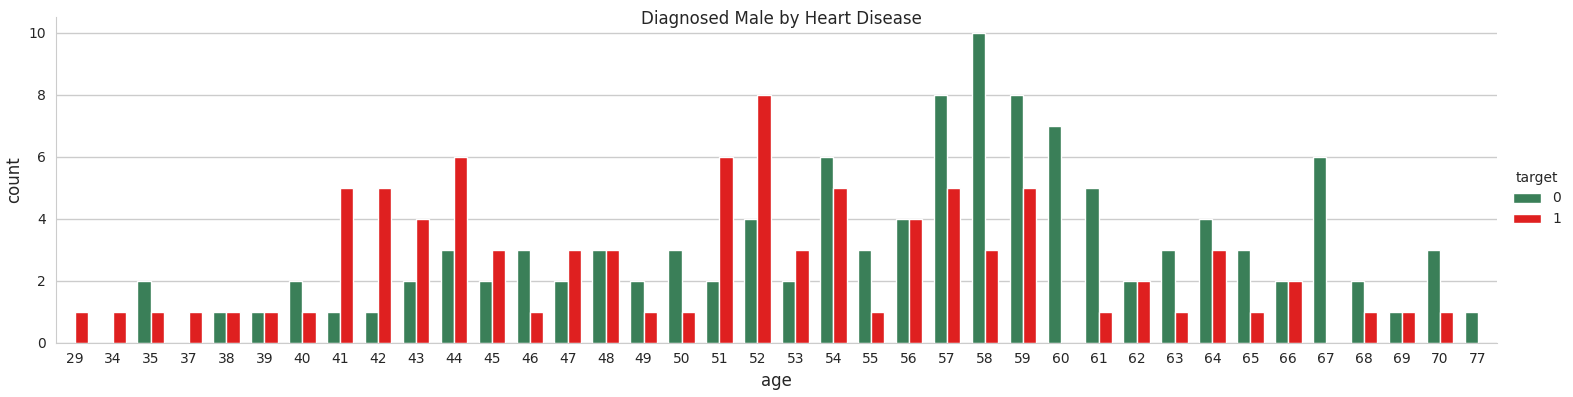

In [63]:
Male = data[data['sex'] == 'Male']                #Male Diagnosed in the data starts from 29 years old, Highly between 41 to 59 yrs old
with sns.axes_style(style = 'whitegrid'):
    c = sns.catplot(data=Male, x = 'age', kind = 'count',hue = 'target',col = None ,width = .7,
                    aspect=3.8,height = 4,palette=['seagreen','red'])
    c.fig.suptitle('Diagnosed Male by Heart Disease')

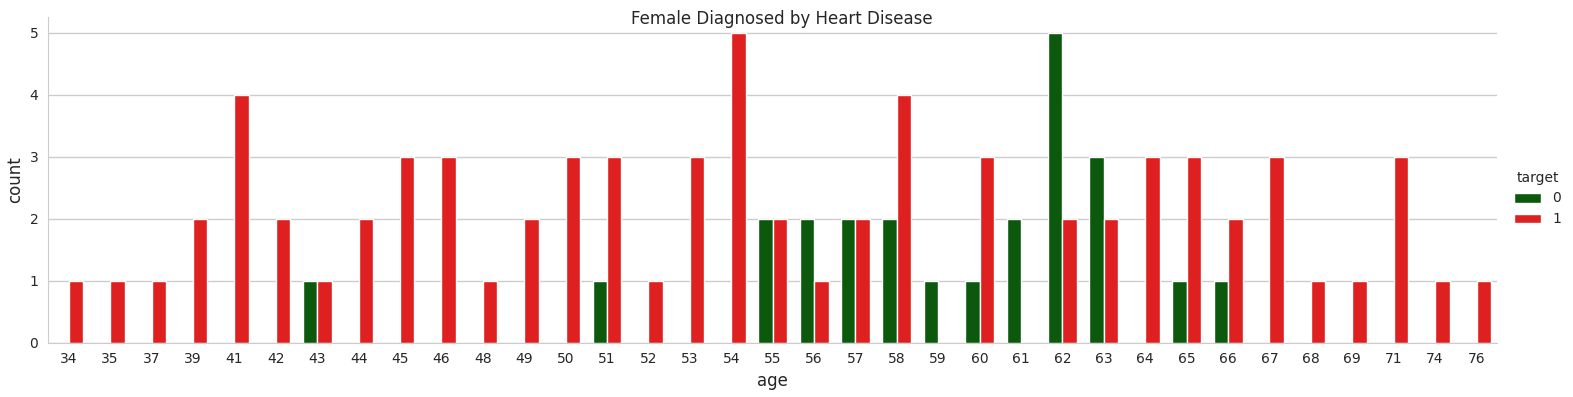

In [69]:
Female = data[data['sex'] == 'Female']                            #Female diagnosed in the data starts from 34 years old
with sns.axes_style(style = 'whitegrid'):
    c = sns.catplot(data=Female, x = 'age', kind = 'count',hue = 'target',col = None ,width = .7,
                    aspect=3.8,height = 4,palette=['darkgreen','red'])
    c.fig.suptitle('Female Diagnosed by Heart Disease')

In [85]:
data.head()

age     sex  Chest_pain_type  resting blood pressure  cholesterol  \
0   63    Male                3                     145          233   
1   37    Male                2                     130          250   
2   41  Female                1                     130          204   
3   56    Male                1                     120          236   
4   57  Female                0                     120          354   

   Fasting Blood Sugar  resting electro cardiographic  heart rate achieved  \
0                    1                              0                  150   
1                    0                              1                  187   
2                    0                              0                  172   
3                    0                              1                  178   
4                    0                              1                  163   

   exang  exercise relative to rest  slope_peak_exercise  \
0      0                        2.3                    0   
1      0                        3.5                    0   
2      0                        1.4                    2   
3      0                        0.8                    2   
4      1                        0.6                    2   

   Number_of_Major_Vessels  thalium_Heart_rate  target  
0                        0                   1       1  
1                        0                   2       1  
2                        0                   2       1  
3                        0                   2       1  
4                        0                   2       1

In [90]:
chest = data['Chest_pain_type'].value_counts()
chest

Chest_pain_type
0    143
2     86
1     50
3     23
Name: count, dtype: int64

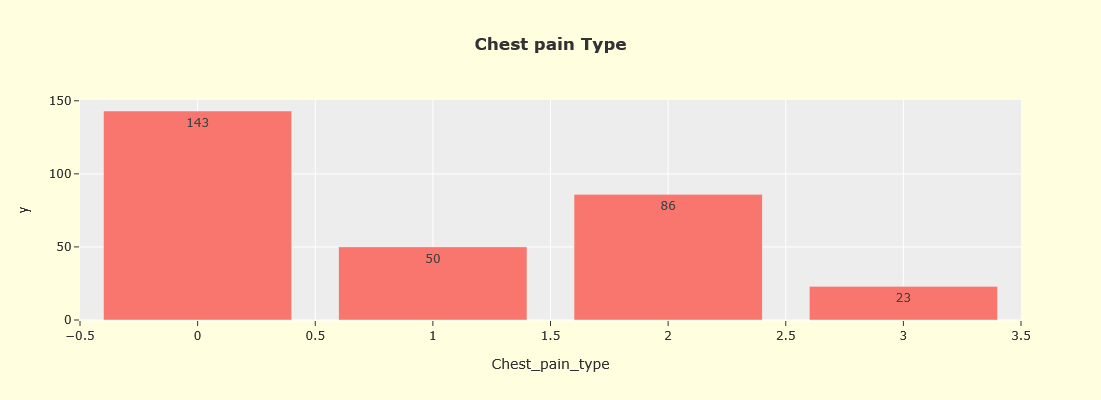

In [94]:
 # (0) = typical angina which usually described as,squeezing, 
 #pressure, heaviness, tightness or pain in the chest
# (3) = the least value,considered asymptomatic 
  #if Have recovered from an illness or condition and no longer have symptoms of that illness or condition
fig = px.bar(chest, x=chest.index, y=chest.values, text_auto=True,  
             title='<b>Chest pain Type<b>',
             template = 'ggplot2')
fig.update_layout(height = 400, width =600 ,paper_bgcolor = 'lightyellow')
fig.show()


<Figure size 6000x2500 with 0 Axes>

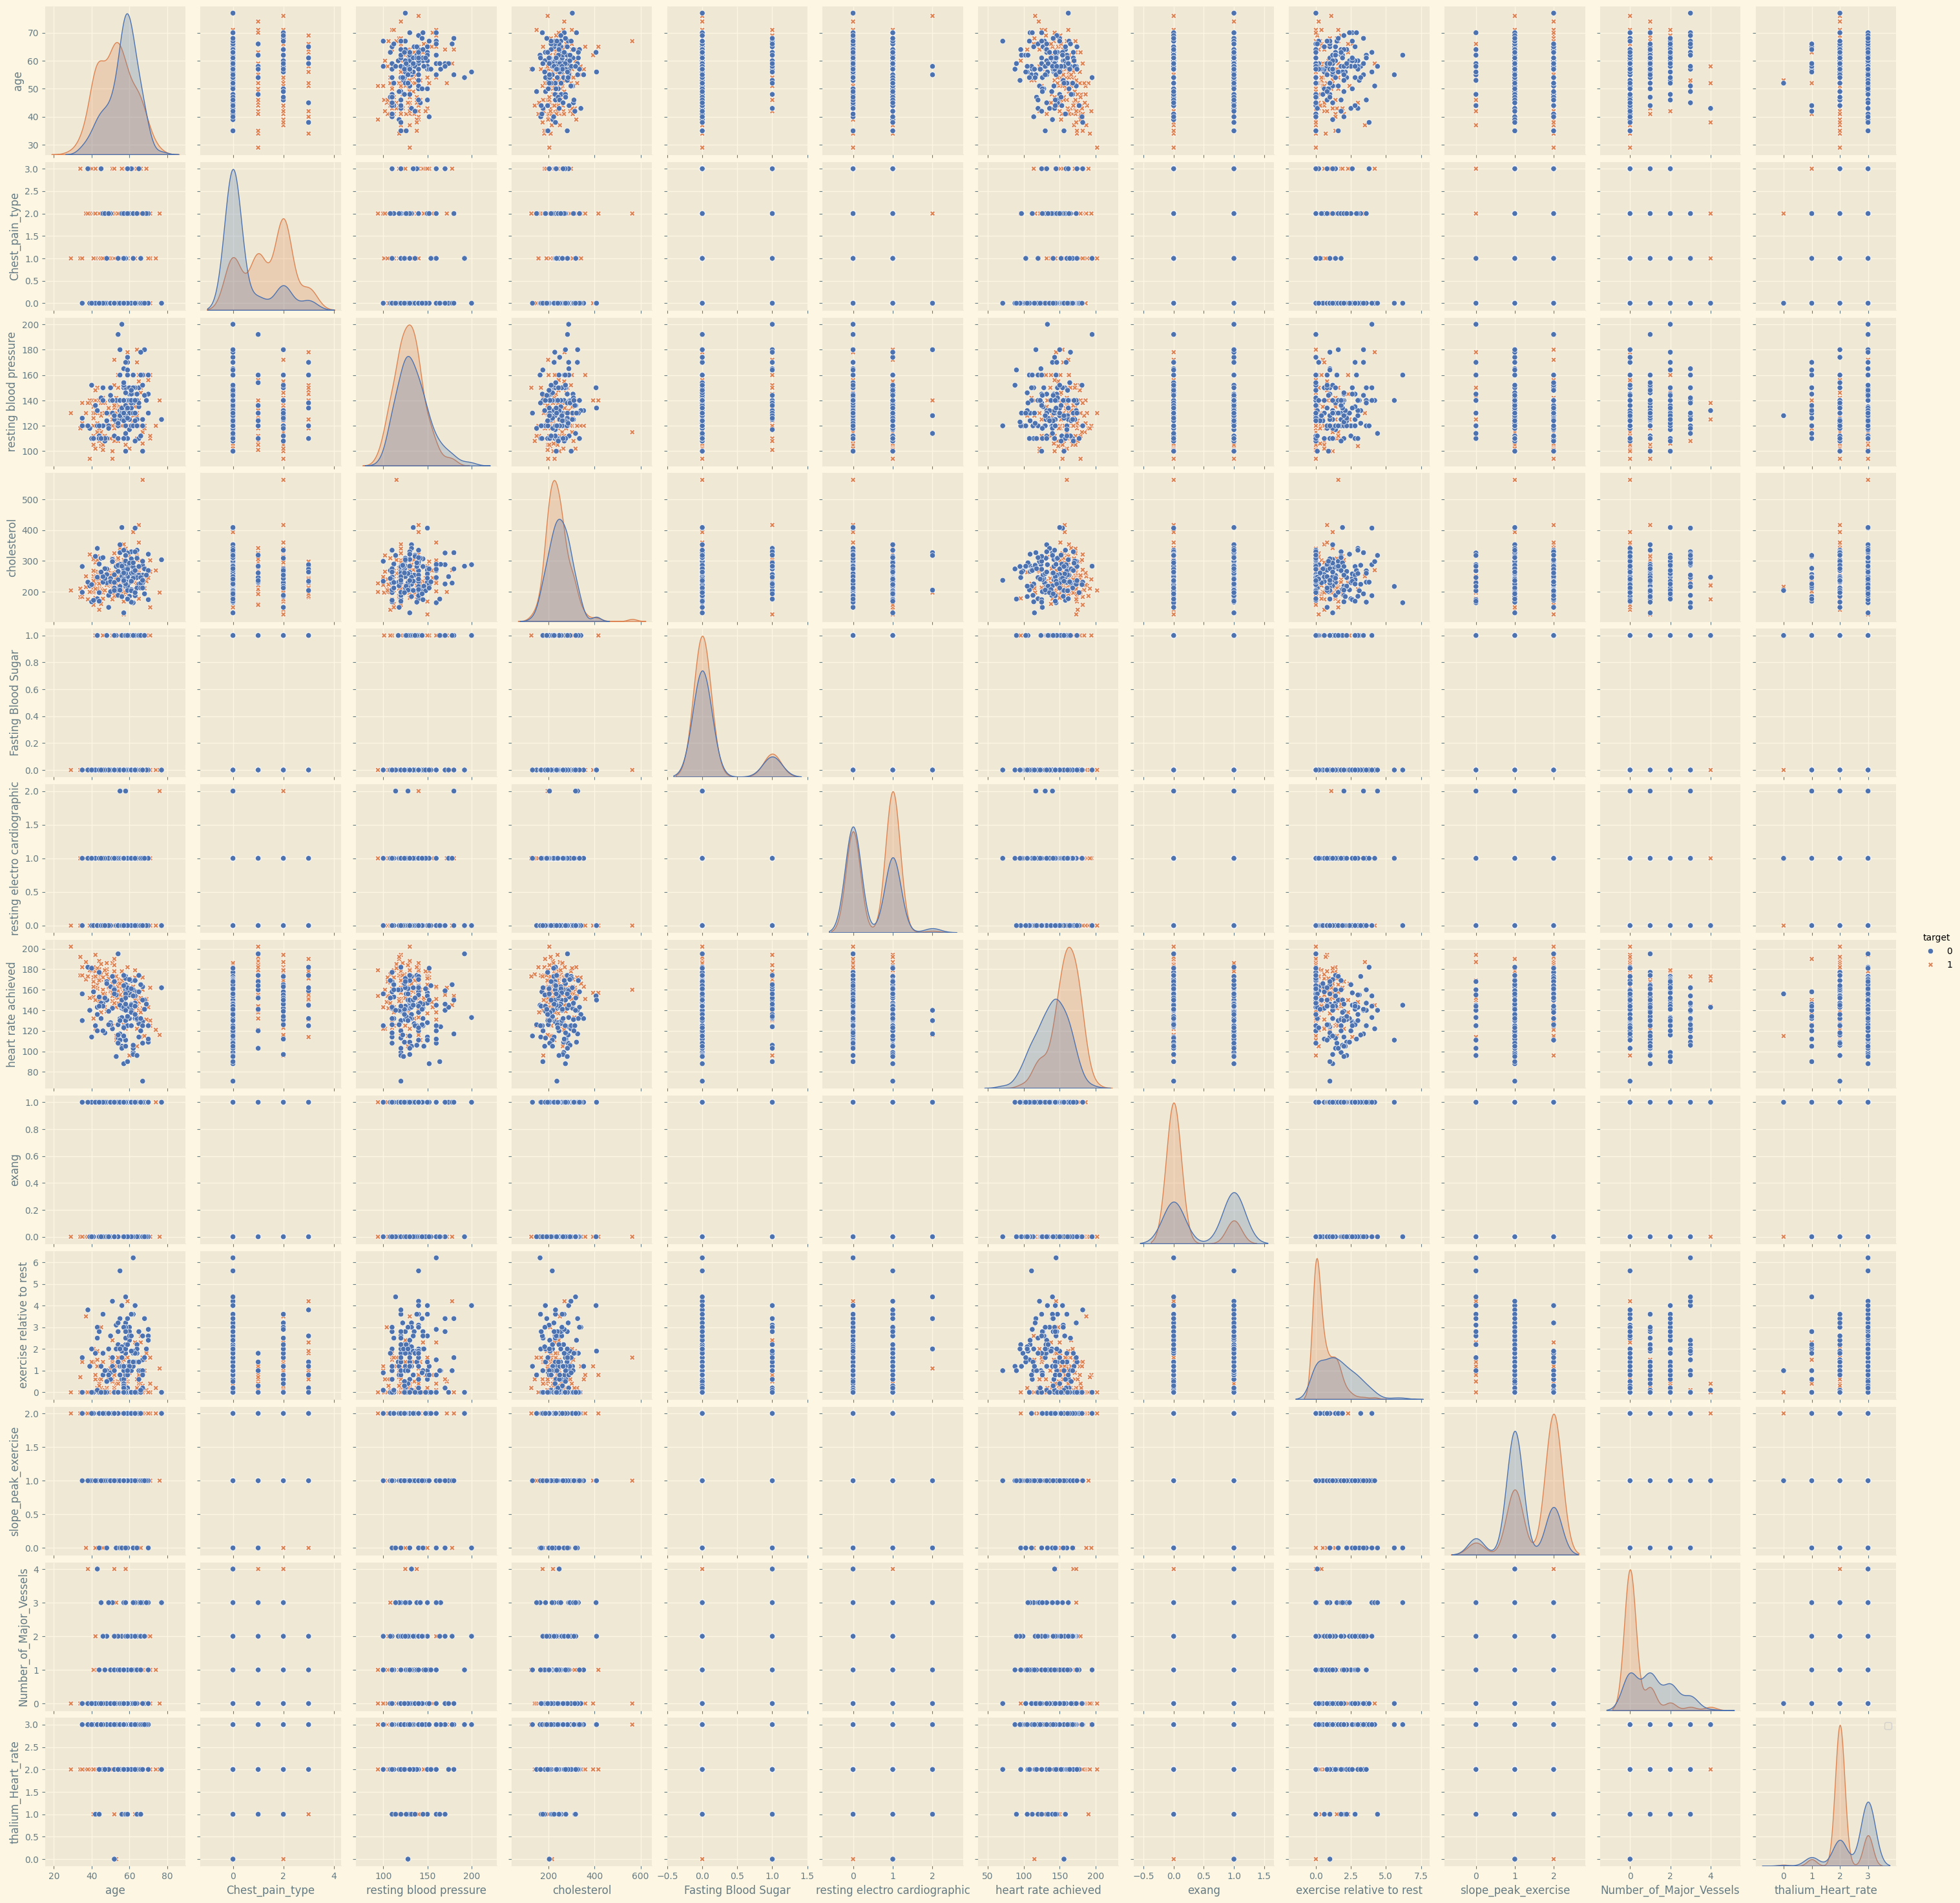

In [97]:
plt.figure(figsize=(60,25))
sns.pairplot(data=data, kind = 'scatter',markers=True,hue='target',palette = 'deep')
plt.legend()

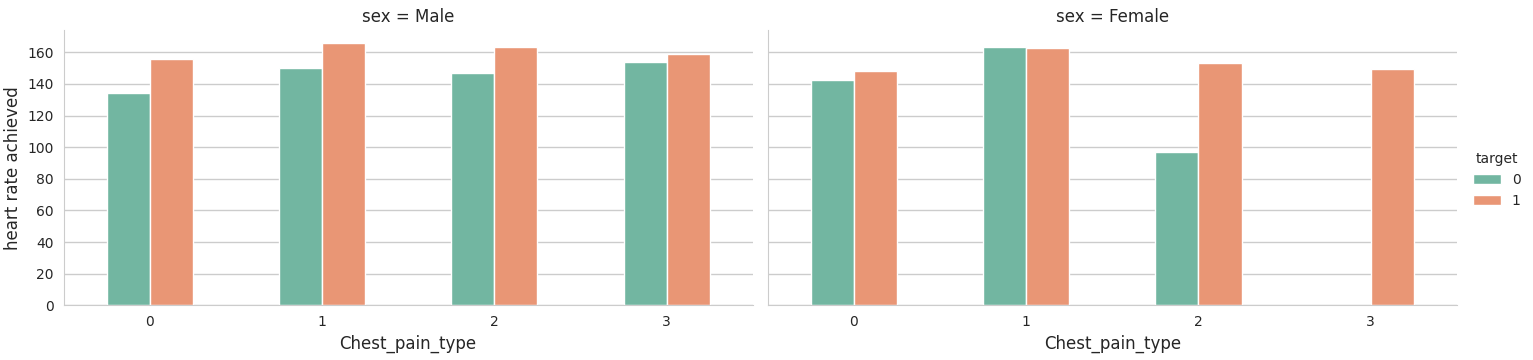

In [106]:
#Males have Maximum heart rate achieved than Females, align with all chest pain types whether diagnosed with Heart disease or not.

with sns.axes_style(style='whitegrid'):
    c = sns.catplot(x ='Chest_pain_type' , y ='heart rate achieved' , hue = 'target', col = 'sex', 
    data = data,kind='bar', height=3.7,width=.5, aspect=2, palette = 'Set2', ci=None)

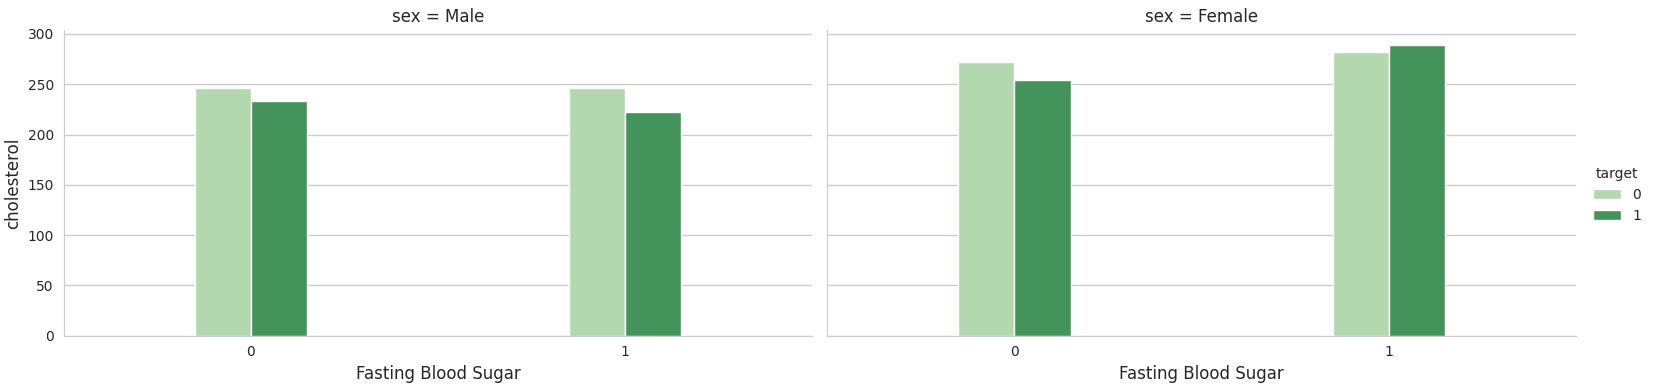

In [120]:
#Females whether Dignosed or not, have highly cholesterol measures than Males 
with sns.axes_style(style='whitegrid'):
    c = sns.catplot(x = 'Fasting Blood Sugar' , y ='cholesterol' , hue = 'target', col ='sex',
                   data = data, kind = 'bar', height=4,width=.3, aspect=2,palette = 'Greens',ci =None)

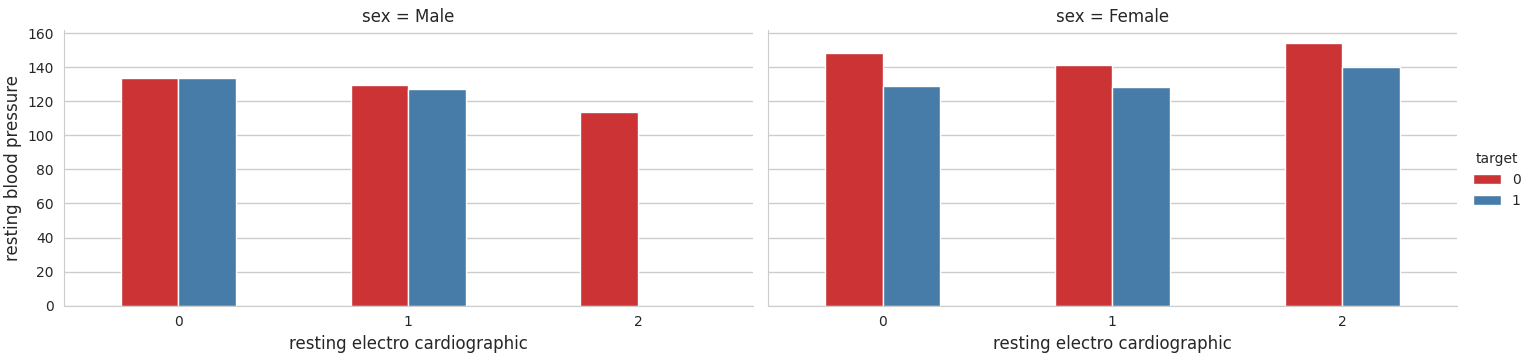

In [123]:
with sns.axes_style(style='whitegrid'):
    c = sns.catplot(x ='resting electro cardiographic', y = 'resting blood pressure',hue = 'target', col = 'sex',
                   data=data, kind = 'bar', height=3.7,width=.5, aspect=2, palette = 'Set1', ci=None)

In [130]:
data['thalium_Heart_rate'].value_counts()

thalium_Heart_rate
2    165
3    117
1     18
0      2
Name: count, dtype: int64

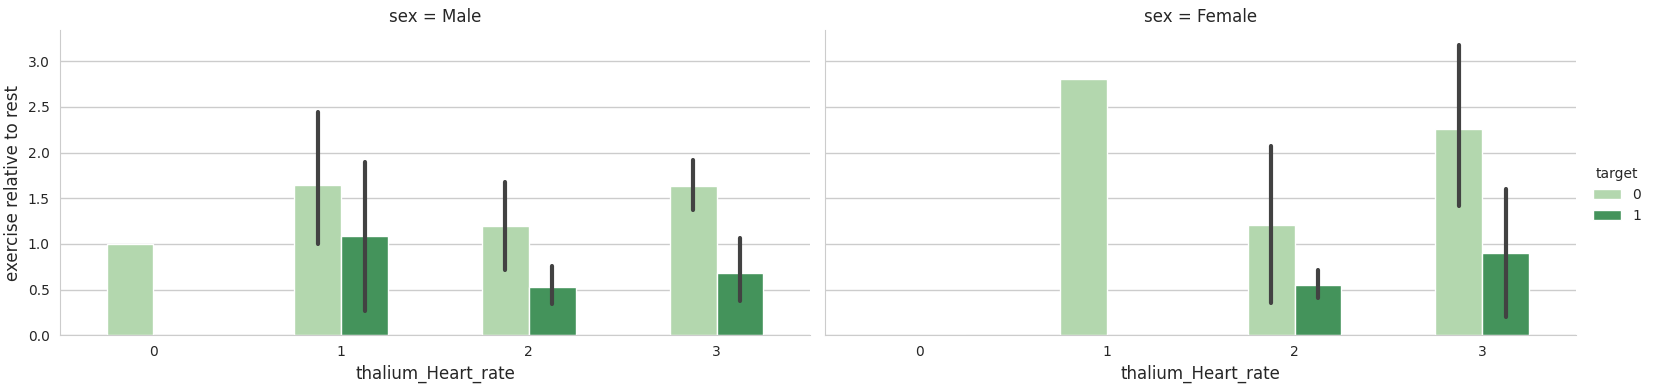

In [137]:
#The low oldpeak, The higher to be Diagnosed.
with sns.axes_style(style = 'whitegrid'):
    c = sns.catplot(x ='thalium_Heart_rate',y='exercise relative to rest',hue = 'target', col = 'sex',col_wrap=2,
    data=data,kind = 'bar', height=4,width=.5, aspect=2, palette = 'Greens')

In [146]:
# slope-(downsloping) are likely to Heart attack
with sns.axes_style(style = 'whitegrid'):
    c = sns.catplot(data=data,x ='slope_peak_exercise',hue = 'target', col = 'sex',col_wrap=2,
    kind = 'count', height=4,width=.5, aspect=2, palette = 'Reds')

<Axes: >

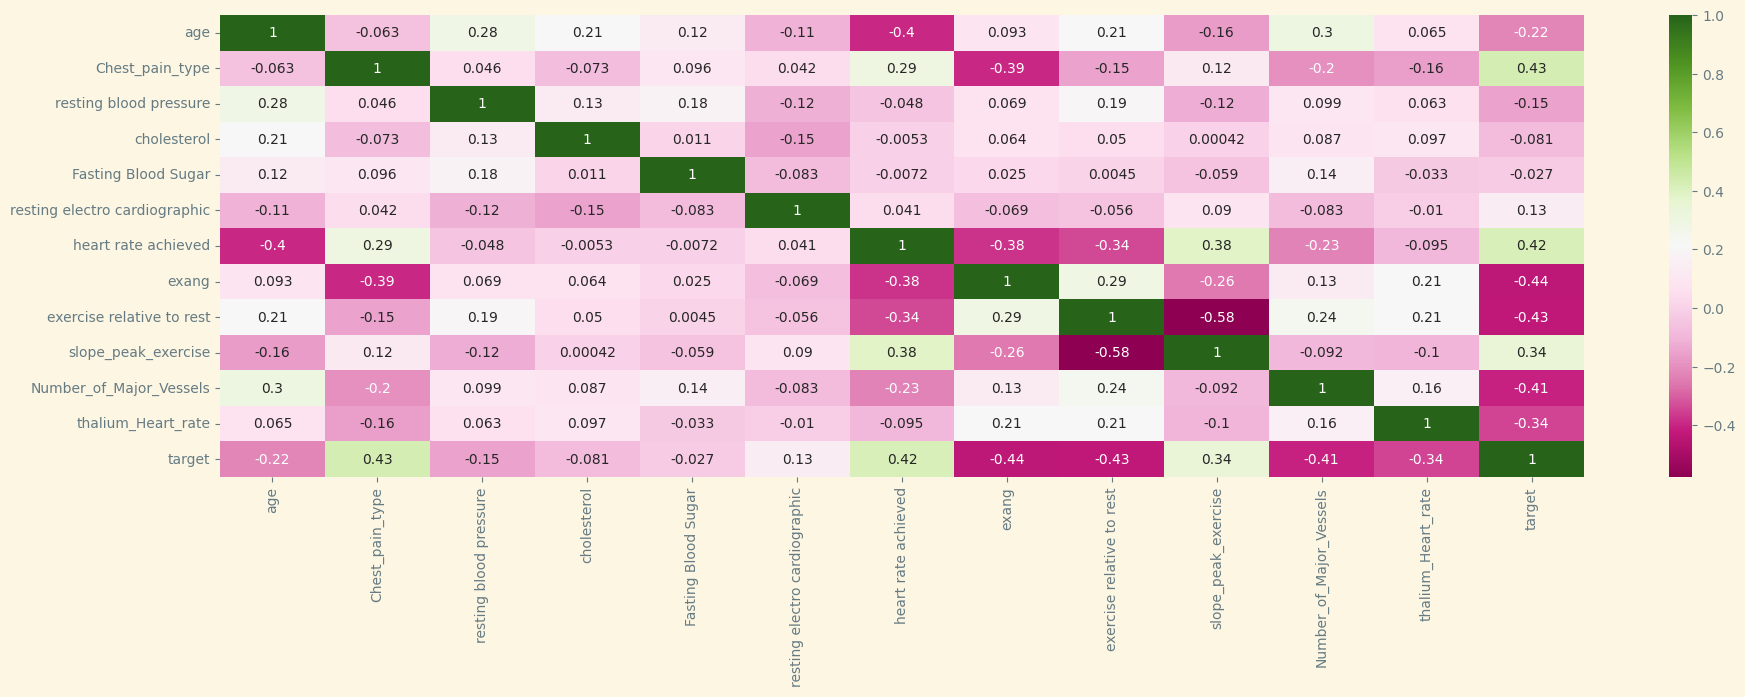

In [152]:
corr = data.drop(columns = ['sex']).corr()
plt.figure(figsize=(22,6))
sns.heatmap(corr, annot=True, cmap = 'PiYG')

In [153]:
data.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting blood pressure',
       'cholesterol', 'Fasting Blood Sugar', 'resting electro cardiographic',
       'heart rate achieved', 'exang', 'exercise relative to rest',
       'slope_peak_exercise', 'Number_of_Major_Vessels', 'thalium_Heart_rate',
       'target'],
      dtype='object')

In [154]:
features = ['age','Chest_pain_type', 'resting blood pressure',
       'cholesterol', 'Fasting Blood Sugar', 'resting electro cardiographic',
       'heart rate achieved', 'exang', 'exercise relative to rest',
       'slope_peak_exercise', 'Number_of_Major_Vessels', 'thalium_Heart_rate']
target = 'target'
x = data[features]
y = data[target]

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (241, 12)
y_train shape: (241,)
x_test shape: (61, 12)
y_test shape: (61,)


In [159]:
#Scaling the data
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [160]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [161]:
print("test_accuracy:" ,lr.score(x_test,y_test))

test_accuracy: 0.8032786885245902
